### Imports for the whole project

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
%matplotlib widget

### Data Import

- Once data is loaded in, convert the timestamp object column into 3 individual columns to be used by the model
  and for searching in the interactive query.
- Once the data has been loaded, the X/y sets are created for our model.
- After the sets are created, we run the Random Forest Regressor model on the training data.
- Finally, run the model on the test data and confirm accuracy score.

In [47]:
data_set = pd.read_csv("bike_data.csv")

data_set.timestamp = pd.to_datetime(data_set.timestamp)

data_set['Month'] = data_set.timestamp.dt.month
data_set['Day'] = data_set.timestamp.dt.day
data_set['Hour'] = data_set.timestamp.dt.hour

data_split = data_set.sample(frac = .1, random_state = 200)
data_split.reset_index()
data_split = data_set.drop(["timestamp","cnt"], axis = 1)
data_split.to_csv('Demo.csv', index = None, header = True)

### Graphs
I will be using this section to show 3 graphs. All will interactive for the user to drill down.

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
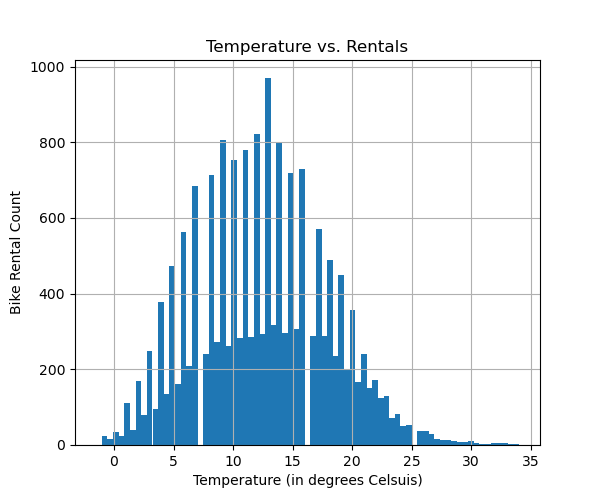

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
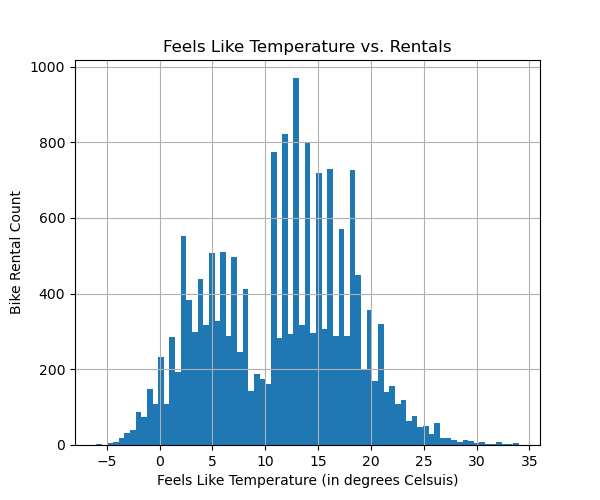

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
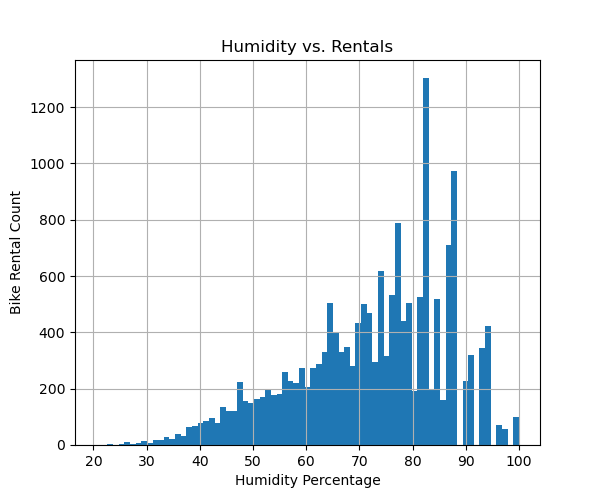

In [34]:
fig = plt.figure(figsize=(6,5))
ax = fig.gca()
feature = data_set['t1']
feature.hist(bins = 75, ax=ax)
ax.set_title("Temperature vs. Rentals")
ax.set_xlabel("Temperature (in degrees Celsuis)")
ax.set_ylabel("Bike Rental Count")
plt.show()

fig = plt.figure(figsize=(6,5))
ax = fig.gca()
feature = data_set['t2']
feature.hist(bins = 75, ax=ax)
ax.set_title("Feels Like Temperature vs. Rentals")
ax.set_xlabel("Feels Like Temperature (in degrees Celsuis)")
ax.set_ylabel("Bike Rental Count")
plt.show()

fig = plt.figure(figsize=(6,5))
ax = fig.gca()
feature = data_set['hum']
feature.hist(bins = 75, ax=ax)
ax.set_title("Humidity vs. Rentals")
ax.set_xlabel("Humidity Percentage")
ax.set_ylabel("Bike Rental Count")
plt.show()

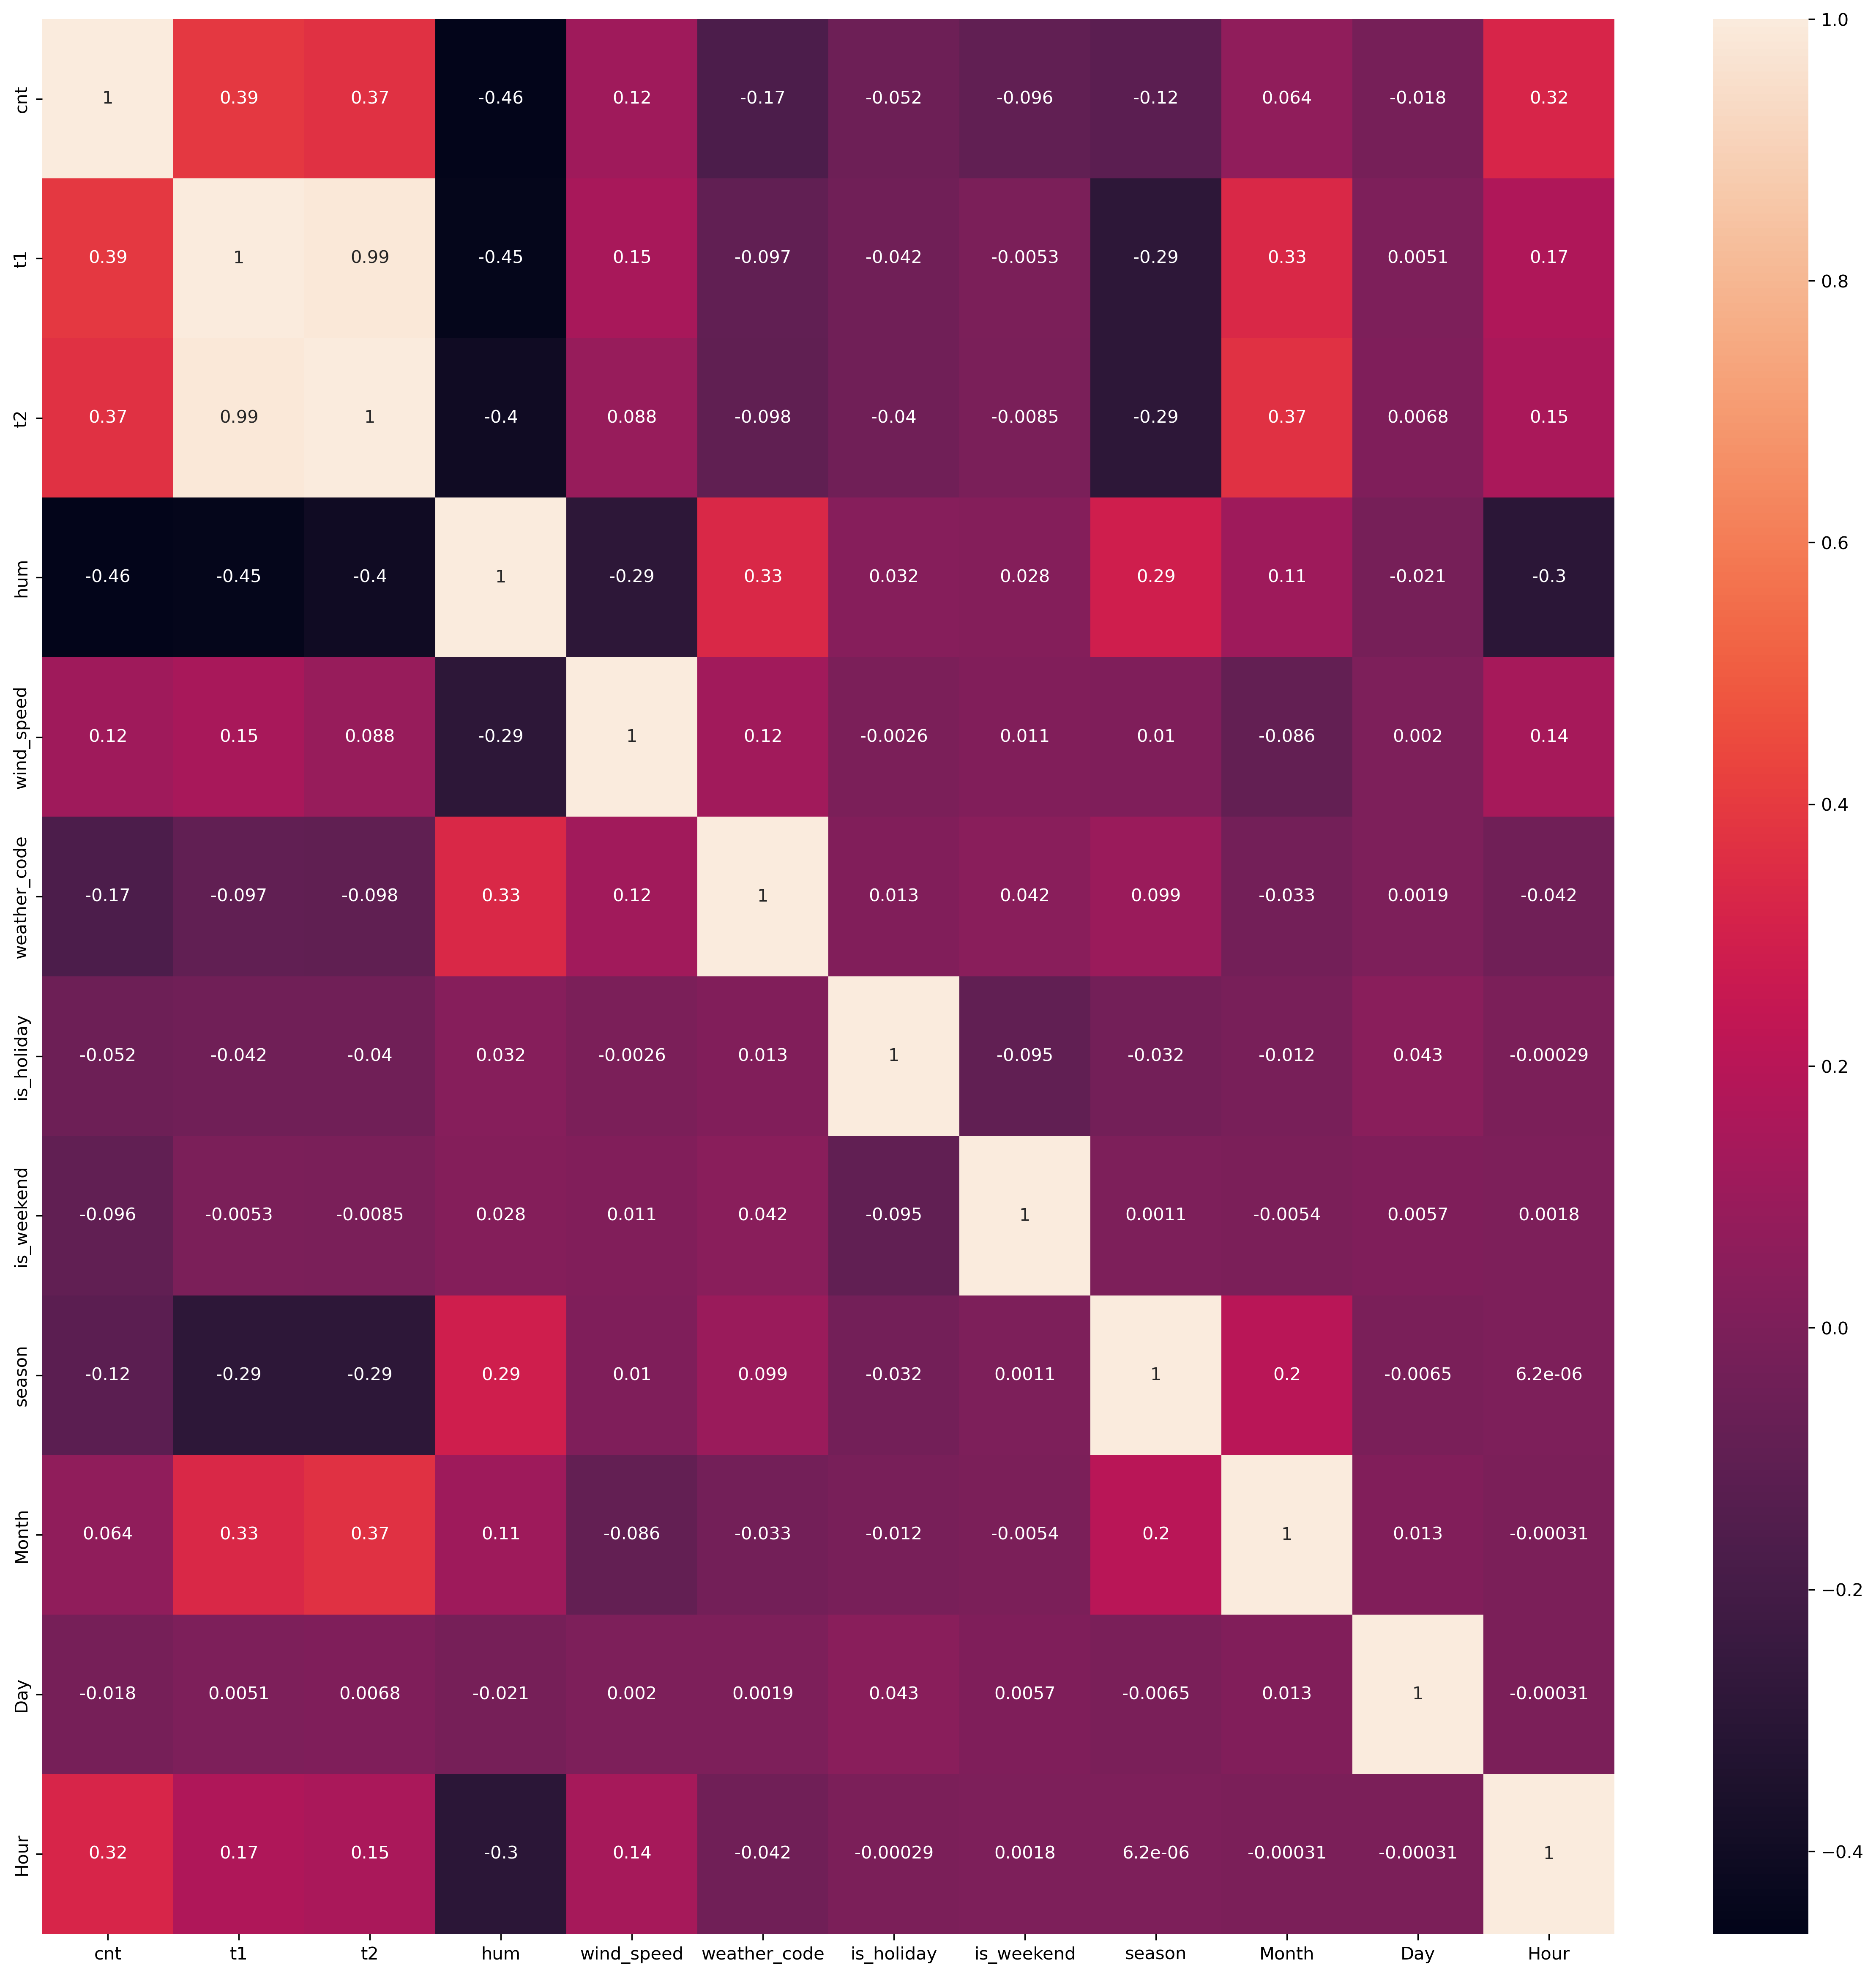

In [40]:
plt.figure(figsize=(20,20), dpi=300)
sns.heatmap(data_set.corr(),annot=True)
plt.show()

In [24]:
X = data_set.drop(["timestamp","cnt"], axis = 1)
y = data_set["cnt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()

X_train[['t1', 't2', 'hum', 'wind_speed', 'month', 'day', 'hour']] = scaler.fit_transform(
                                                                    X_train[['t1', 't2', 'hum', 
                                                                             'wind_speed', 'Month', 'Day', 'Hour']])
X_test[['t1', 't2', 'hum', 'wind_speed', 'month', 'day', 'hour']] = scaler.fit_transform(
                                                                    X_test[['t1', 't2', 'hum', 
                                                                            'wind_speed', 'Month', 'Day', 'Hour']])
                                               

In [25]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
percentage = "{:.0%}".format(score)
print("This ensemble model is " + percentage + " accurate.")

The ensemble model is 95% accurate.


## Predictions
With the model now trained, this is the segment of code that will run on the "Demo" data to make a prediction of bike rentals for future days.

In [81]:
future_data = pd.read_csv("Demo.csv")

future_data[['t1', 't2', 'hum', 'wind_speed', 'month', 'day', 'hour']] = scaler.fit_transform(
                                                                    future_data[['t1', 't2', 'hum',       
                                                                            'wind_speed', 'Month', 'Day', 'Hour']])

predictions = model.predict(future_data)


future_data["Predicted Rentals"] = predictions.astype(int)
future_data[["Month","Day","Hour","Predicted Rentals"]].head()

,Month,Day,Hour,Predicted Rentals
0,1,4,0,243
1,1,4,1,225
2,1,4,2,148
3,1,4,3,224
4,1,4,4,57
